In [1]:
from pyvesc import VESC
from time import sleep
from holonomic import *
import os


serial_names = ['pci-0000:00:14.0-usb-0:7.4.3:1.0',
                'pci-0000:00:14.0-usb-0:7.2:1.0',
                'pci-0000:00:14.0-usb-0:7.3:1.0',
                'pci-0000:00:14.0-usb-0:7.1:1.0']


front_left = serial_names[1]
front_right = serial_names[3]
back_left = serial_names[2]
back_right = serial_names[0]


# vescs = /dev/serial/by-path/[vesc1, vesc2, vesc3, vesc4]
p="/dev/serial/by-path/"
vescs = [p+fn for fn in serial_names]
print(vescs)

motors = list()
for vesc in vescs:
    sleep(0.5)
    motors.append(VESC(serial_port=vesc))

front_left = motors[1]
front_right = motors[3]
rear_left = motors[2]
rear_right = motors[0]

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
['/dev/serial/by-path/pci-0000:00:14.0-usb-0:7.4.3:1.0', '/dev/serial/by-path/pci-0000:00:14.0-usb-0:7.2:1.0', '/dev/serial/by-path/pci-0000:00:14.0-usb-0:7.3:1.0', '/dev/serial/by-path/pci-0000:00:14.0-usb-0:7.1:1.0']


In [3]:
def set_duty_cycle(val):
    if val>0.5:
        val=0.5
    if val<-0.5:
        val=-0.5
    front_left.set_duty_cycle(val)

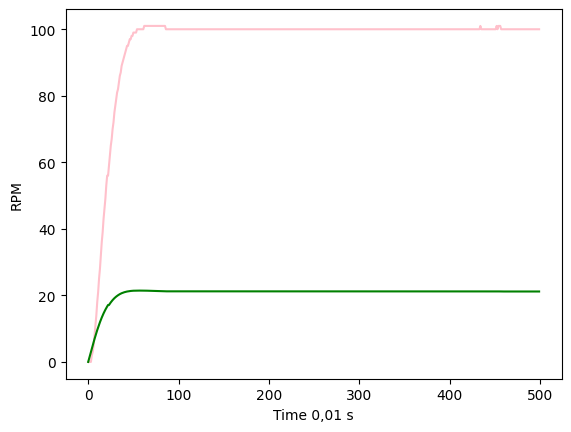

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

rpml = list()
duty_cycle_list = list()
rpmobj = 100
rcount = 0
current_duty_cycle = 0
k = 0.0001

def asserv(rpmobj, rpm, k):
    err = rpmobj - rpm
    delta = k * err
    return(delta)

for i in range(500) :

    try:
        rpm = -front_left.get_rpm()
        rpml.append(rpm)
        duty_cycle_list.append(current_duty_cycle*100)
    except AttributeError:
        rcount = rcount+1
        rpml.append(rpml[-1])
        duty_cycle_list.append(current_duty_cycle*100)
        continue

    current_duty_cycle = current_duty_cycle+asserv(rpmobj, rpm, k)  
    set_duty_cycle(current_duty_cycle)
    sleep(0.01)

set_duty_cycle(.0)

plt.plot(range(len(rpml)), rpml, '-', color='pink')
plt.plot(range(len(duty_cycle_list)), duty_cycle_list, '-', color='green')
plt.ylabel('RPM')
plt.xlabel('Time 0,01 s')

#print(rpml)
#print(duty_cycle_list)
plt.show()

Text(0.5, 0, 'Time 0,01 s')

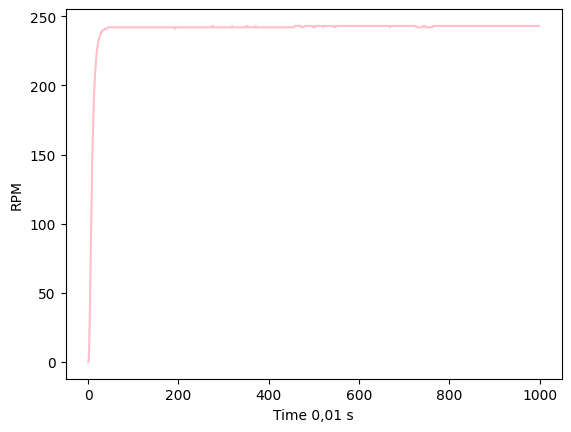

In [10]:
plt.plot(range(len(rpml)), rpml, '-', color='pink')
plt.ylabel('RPM')
plt.xlabel('Time 0,01 s')

In [20]:
set_duty_cycle(.0)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(100), rpml)
plt.ylabel('RPM')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (4,)

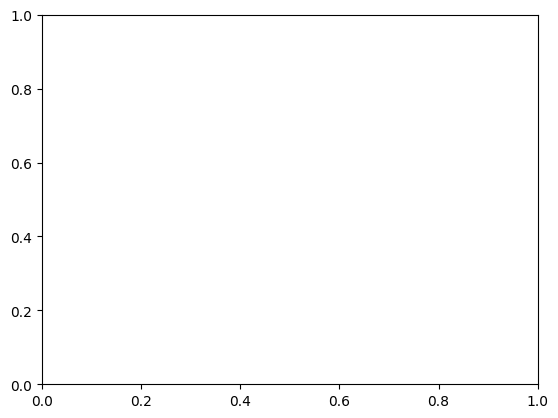